In [335]:
!wget https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv

--2020-02-19 12:33:10--  https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10305 (10K) [text/plain]
Saving to: ‘titanic.csv.6’

titanic.csv.6       100%[===================>]  10.06K  --.-KB/s    in 0s      

2020-02-19 12:33:10 (150 MB/s) - ‘titanic.csv.6’ saved [10305/10305]



**VARIABLE DESCRIPTIONS**</br>
**Pclass** Passenger Class  (1 = 1st; 2 = 2nd; 3 = 3rd)</br>
**survival**    Survival  (0 = No; 1 = Yes)</br>
**name** Name</br>
**sex** Sex</br>
**age** Age</br>
**sibsp** Number of Siblings/Spouses Aboard</br>
**parch** Number of Parents/Children Aboard</br>
**ticket** Ticket Number</br>
**fare** Passenger Fare (British pound)</br>
**cabin** Cabin </br>
**embarked** Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</br>
* * *
http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf


In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv',sep="\t")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
del df['Name']
del df['Ticket']
del df['Cabin']
del df['PassengerId']

In [0]:
# cleanup= {"Embarked": {"C":1, "Q":2, "S":3},
#           "Sex": {"male":0, "female":1}}

In [0]:
# df.replace(cleanup, inplace=True)

In [0]:
mean_age = df['Age'].mean()

In [341]:
df.isnull().sum(axis=0)

Survived     0
Pclass       0
Sex          0
Age         30
SibSp        0
Parch        0
Fare         0
Embarked     1
dtype: int64

In [0]:
df['Age'].fillna(mean_age,inplace=True)

In [0]:
# df.dropna(inplace=True)

In [344]:
df['Age'].isnull().any()

False

In [345]:
df['Age'].value_counts(dropna=False)

28.141508    30
21.000000     8
29.000000     6
19.000000     6
22.000000     6
28.000000     5
24.000000     5
38.000000     4
26.000000     4
20.000000     4
2.000000      3
16.000000     3
17.000000     3
34.000000     3
35.000000     3
18.000000     3
14.000000     3
23.000000     3
33.000000     3
27.000000     3
32.000000     2
42.000000     2
40.000000     2
4.000000      2
51.000000     2
45.000000     2
25.000000     2
54.000000     2
37.000000     2
47.000000     2
32.500000     2
58.000000     1
39.000000     1
55.500000     1
55.000000     1
31.000000     1
15.000000     1
9.000000      1
3.000000      1
8.000000      1
66.000000     1
70.500000     1
14.500000     1
71.000000     1
59.000000     1
46.000000     1
30.000000     1
11.000000     1
5.000000      1
28.500000     1
65.000000     1
40.500000     1
49.000000     1
7.000000      1
12.000000     1
36.500000     1
0.830000      1
Name: Age, dtype: int64

In [346]:
df['Embarked'].value_counts(dropna=False)

S      110
C       32
Q       13
NaN      1
Name: Embarked, dtype: int64

In [0]:
highest_occur_embarked = df['Embarked'].value_counts().head(1).index[0]

In [0]:
df['Embarked'].fillna(highest_occur_embarked, inplace=True)

In [0]:
# df['Cabin'].fillna("unidentified", inplace=True)

In [350]:
df['Parch'].value_counts(dropna=False)

0    121
2     17
1     15
5      2
3      1
Name: Parch, dtype: int64

In [351]:
# del df['Age']
# del df['Embarked']
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
enc = LabelEncoder()
df['Sex'] = enc.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
151    0
152    1
153    1
154    1
155    1
Name: Sex, Length: 156, dtype: int64

In [352]:
df['Embarked'] = enc.fit_transform(df['Embarked'])
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
151    2
152    2
153    2
154    2
155    0
Name: Embarked, Length: 156, dtype: int64

In [353]:
print([{key,val} for key,val in enumerate(df.columns)])

[{0, 'Survived'}, {1, 'Pclass'}, {2, 'Sex'}, {3, 'Age'}, {4, 'SibSp'}, {5, 'Parch'}, {6, 'Fare'}, {'Embarked', 7}]


In [354]:
df['Survived'].dtype

dtype('int64')

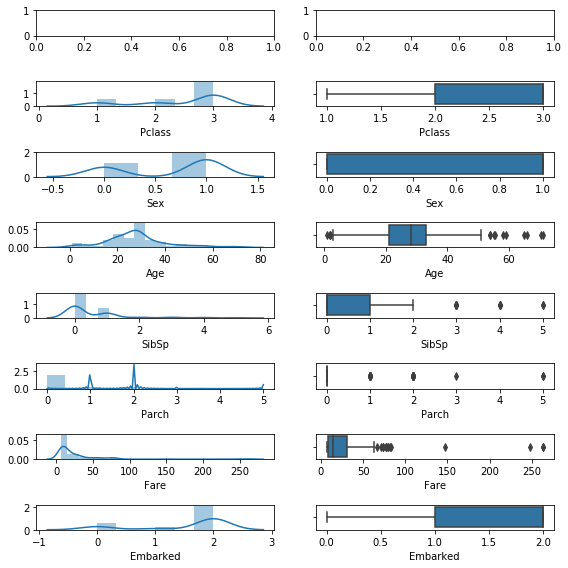

In [355]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 8))
for i, c in enumerate(df.columns):
    if c == 'Survived':
        continue
    sns.distplot(df[c], ax=axes[i][0])
    sns.boxplot(x=c, data=df, ax=axes[i][1])
plt.tight_layout()

In [356]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.116340,-0.579062,-0.106578,-0.066943,0.039435,0.029343,-0.072072
Pclass,-0.116340,1.000000,-0.038892,-0.332233,0.087420,0.016491,-0.607256,0.115187
Sex,-0.579062,-0.038892,1.000000,0.176367,-0.184527,-0.103897,-0.006689,0.022350
Age,-0.106578,-0.332233,0.176367,1.000000,-0.378670,-0.207651,0.023235,-0.031098
SibSp,-0.066943,0.087420,-0.184527,-0.378670,1.000000,0.399040,0.271997,0.085307
Parch,0.039435,0.016491,-0.103897,-0.207651,0.399040,1.000000,0.254822,0.087342
Fare,0.029343,-0.607256,-0.006689,0.023235,0.271997,0.254822,1.000000,-0.112638
Embarked,-0.072072,0.115187,0.022350,-0.031098,0.085307,0.087342,-0.112638,1.000000


In [357]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    stratify=df['Survived'],
    random_state=42)

print(train_df.shape)
print(test_df.shape)

(124, 8)
(32, 8)


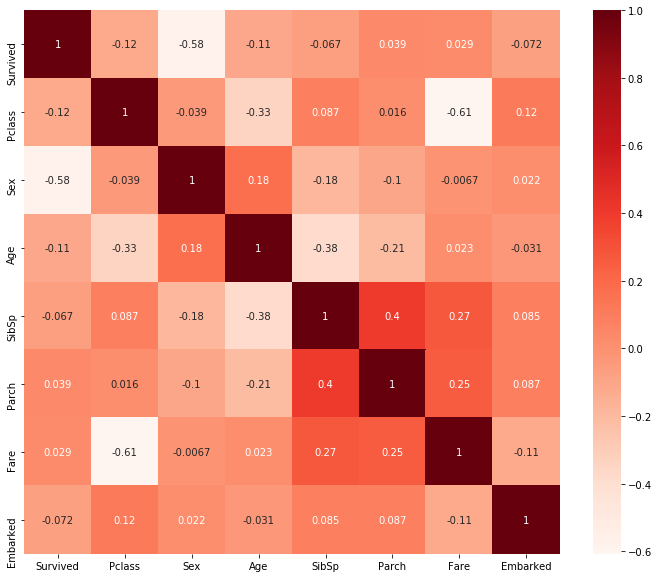

In [358]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [359]:
#Correlation with output variable
cor_target = abs(cor["Survived"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Survived    1.000000
Sex         0.579062
Name: Survived, dtype: float64

In [0]:
features = ['Sex']

In [0]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_train_df = pd.DataFrame(
    scaler.fit_transform(train_df[features]), 
    index=train_df.index,
    columns=features)
scaled_train_df['Survived'] = train_df['Survived']

In [0]:
# fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(8, 8))
# for i, c in enumerate(train_df.columns):
#     if c == 'Survived':
#       continue
#     sns.violinplot(y='Survived', x=c, data=train_df, ax=axes[i][0])
#     sns.violinplot(y='Survived', x=c, data=scaled_train_df, ax=axes[i][1])
# plt.tight_layout()

In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(scaled_train_df[features], scaled_train_df['Survived'])

In [364]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(scaled_train_df[features])
accuracy_score(train_df['Survived'], y_pred_train)

0.8064516129032258

In [365]:
scaled_test_df = pd.DataFrame(
    scaler.transform(test_df[features]), 
    index=test_df.index,
    columns=features)

y_pred_test = clf.predict(scaled_test_df[features])
accuracy_score(test_df['Survived'], y_pred_test)

0.8125